In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

## Exercise 2

In [2]:
# Load in training and testing data
# and keep only 2's and 3's
train_data = np.loadtxt("zip.train")
train_data = train_data[(train_data[:, 0] == 2) | (train_data[:, 0] == 3)]
train_labels = train_data[:, 0]
train_X = train_data[:, 1:]

test_data = np.loadtxt("zip.test")
test_data = test_data[(test_data[:, 0] == 2) | (test_data[:, 0] == 3)]
test_labels = test_data[:, 0]
test_X = test_data[:, 1:]

In [3]:
# Fit the linear model and record train/test errors
linear_model = LogisticRegression(max_iter=5000).fit(train_X, train_labels)
lm_train_error = 1 - linear_model.score(train_X, train_labels)
lm_test_error = 1 - linear_model.score(test_X, test_labels)

In [4]:
# Fit the KNN models and record train/test errors
k_values = [1, 3, 5, 7, 15]
knn_train_errors = []
knn_test_errors = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_labels)
    knn_train_error = 1 - knn_model.score(train_X, train_labels)
    knn_test_error = 1 - knn_model.score(test_X, test_labels)
    
    knn_train_errors.append(knn_train_error)
    knn_test_errors.append(knn_test_error)

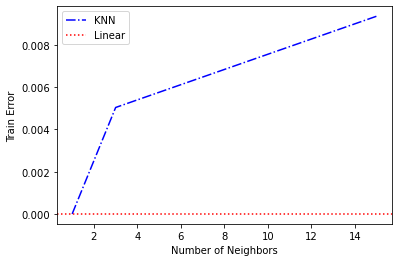

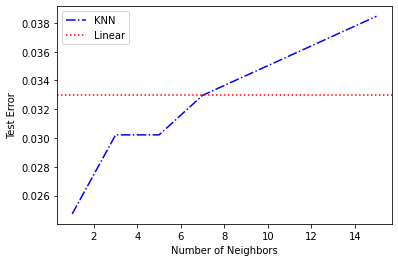

In [5]:
plt.plot(k_values, knn_train_errors, 'b-.', label='KNN')
plt.axhline(lm_train_error, color='r', linestyle=':', label="Linear")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Train Error")

plt.figure()
plt.plot(k_values, knn_test_errors, 'b-.', label="KNN")
plt.axhline(lm_test_error, color='r', linestyle=':', label="Linear")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Test Error");